In [50]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [6]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes.shape

(768, 9)

In [11]:
diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

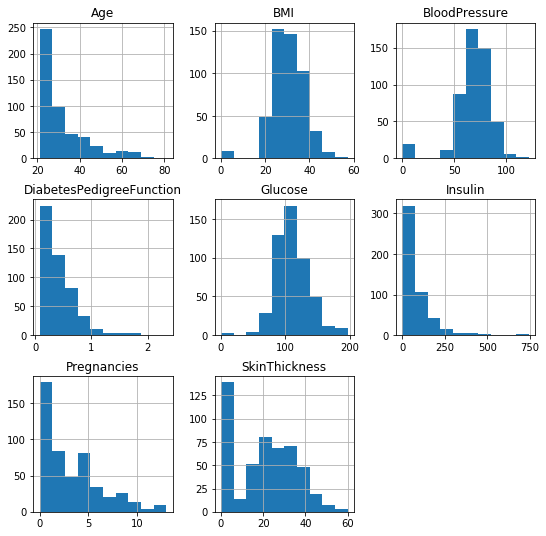

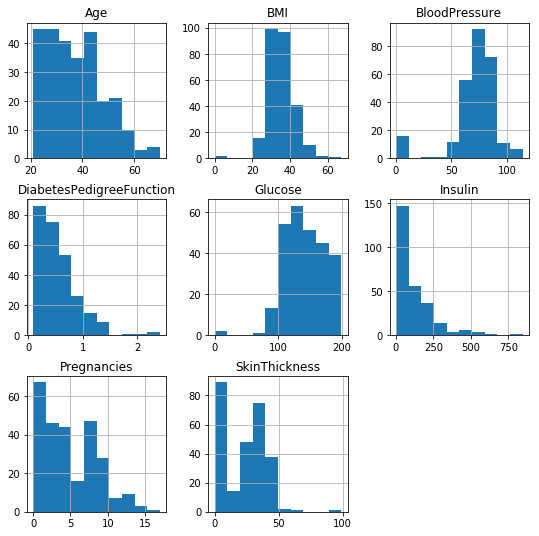

In [13]:
diabetes.groupby('Outcome').hist(figsize=(9,9))

In [17]:
diabetes.isnull().sum()
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
print (diabetes[diabetes.BloodPressure == 0].shape[0])
diabetes[diabetes.BloodPressure == 0].groupby('Outcome')['Age'].count()

35


Outcome
0    19
1    16
Name: Age, dtype: int64

In [25]:
print(diabetes[diabetes.Glucose == 0].shape[0])
diabetes[diabetes.Glucose == 0].groupby('Outcome')['Age'].count()

5


Outcome
0    3
1    2
Name: Age, dtype: int64

In [27]:
print(diabetes[diabetes.SkinThickness == 0].shape[0])
diabetes[diabetes.SkinThickness == 0].groupby('Outcome')['Age'].count()

227


Outcome
0    139
1     88
Name: Age, dtype: int64

In [28]:
print(diabetes[diabetes.BMI == 0].shape[0])
diabetes[diabetes.BMI == 0].groupby('Outcome')['Age'].count()

11


Outcome
0    9
1    2
Name: Age, dtype: int64

In [29]:
print(diabetes[diabetes.Insulin == 0].shape[0])
diabetes[diabetes.Insulin == 0].groupby('Outcome')['Age'].count()

374


Outcome
0    236
1    138
Name: Age, dtype: int64

In [30]:
diabetes_mod = diabetes[(diabetes.BloodPressure !=0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]

print(diabetes_mod.shape)

(724, 9)


In [32]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

x = diabetes_mod[feature_names]
y = diabetes_mod.Outcome

In [37]:
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = diabetes_mod.Outcome, random_state = 0)

In [41]:
names = []
scores = []

for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
    
tr_split = pd.DataFrame({'Name': names, 'Score':scores})
print(tr_split)

C:\Users\ariefTora\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ariefTora\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ariefTora\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


  Name     Score
0  KNN  0.729282
1  SVC  0.657459
2   LR  0.767956
3   DT  0.756906
4  GNB  0.734807
5   RF  0.729282
6   GB  0.773481


In [53]:
strat_k_fold = StratifiedKFold(n_splits=10, random_state=10)

names = []
scores = []

for name, model in models:
    score = cross_val_score(model, x, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)
    
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

C:\Users\ariefTora\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ariefTora\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ariefTora\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ariefTora\Anaconda3\lib\site-packages\sklearn\svm\base.py:

  Name     Score
0  KNN  0.711521
1  SVC  0.656075
2   LR  0.776440
3   DT  0.681423
4  GNB  0.755681
5   RF  0.743180
6   GB  0.765442


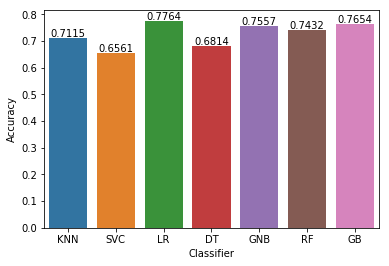

In [54]:
axis = sns.barplot(x='Name', y='Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha='center')
    
plt.show()

In [57]:
from sklearn.feature_selection import RFECV

logreg_model = LogisticRegression(solver='lbfgs', max_iter=4000)

rfecv = RFECV(estimator=logreg_model, step=1, cv=strat_k_fold, scoring='accuracy')
rfecv.fit(x, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=False),
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=4000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

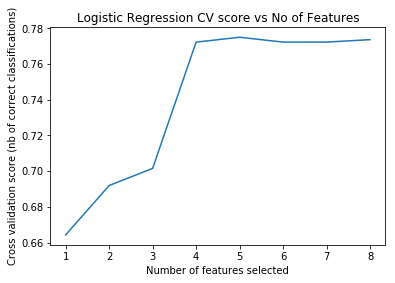

In [58]:
plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (nb of correct classifications)')
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.show()

In [60]:
feature_importance = list(zip(feature_names, rfecv.support_))

new_features = []

for key, value in enumerate(feature_importance):
    if(value[1] == True):
        new_features.append(value[0])
        
print(new_features)

['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [62]:
x_new = diabetes_mod[new_features]

initial_score = cross_val_score(logreg_model, x, y, cv=strat_k_fold, scoring='accuracy').mean()
print('Initial accuracy:', initial_score)

fe_score = cross_val_score(logreg_model, x_new, y, cv=strat_k_fold, scoring='accuracy').mean()
print('Accuracy after Feature Selection:', fe_score)

Initial accuracy: 0.7736617574549275
Accuracy after Feature Selection: 0.7750125945934357


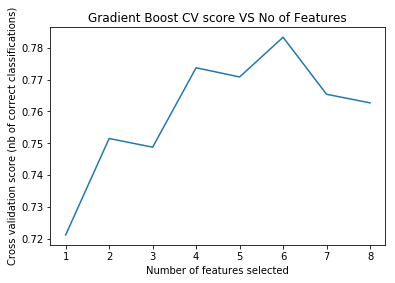

In [64]:
gb_model = GradientBoostingClassifier()

gb_rfecv = RFECV(estimator=gb_model, step=1, cv=strat_k_fold, scoring='accuracy')
gb_rfecv.fit(x, y)

plt.figure()
plt.title('Gradient Boost CV score VS No of Features')
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (nb of correct classifications)')
plt.plot(range(1, len(gb_rfecv.grid_scores_)+1), gb_rfecv.grid_scores_)
plt.show()

In [65]:
feature_importance = list(zip(feature_names, gb_rfecv.support_))

new_features = []

for key, value in enumerate(feature_importance):
    if(value[1] == True):
        new_features.append(value[0])
        
print(new_features)

['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [67]:
x_new_gb = diabetes_mod[new_features]

initial_score = cross_val_score(gb_model, x, y, cv=strat_k_fold, scoring='accuracy').mean()
print('Initial accuracy:', initial_score)

fe_score = cross_val_score(gb_model, x_new_gb, y, cv=strat_k_fold, scoring='accuracy').mean()
print('Accuracy after Feature Selection', fe_score)

Initial accuracy: 0.7627213432803824
Accuracy after Feature Selection 0.7847157909404678


In [68]:
from sklearn.model_selection import GridSearchCV

In [72]:
c_values = list(np.arange(1, 10))

param_grid = [
    {'C': c_values, 'penalty': ['l1'], 'solver': ['liblinear'], 'multi_class': ['ovr']},
    {'C': c_values, 'penalty': ['l2'], 'solver': ['liblinear', 'newton-cg', 'lbfgs'], 'multi_class': ['ovr']}
]

In [73]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=strat_k_fold, scoring='accuracy', iid=False)
grid.fit(x_new, y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=False),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=None,
       param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'penalty': ['l1'], 'multi_class': ['ovr'], 'solver': ['liblinear']}, {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'penalty': ['l2'], 'multi_class': ['ovr'], 'solver': ['liblinear', 'newton-cg', 'lbfgs']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [74]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1, 'penalty': 'l2', 'multi_class': 'ovr', 'solver': 'liblinear'}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)


In [76]:
logreg_new = LogisticRegression(C=1, multi_class='ovr', penalty='l2', solver='liblinear')

initial_score = cross_val_score(logreg_new, x_new, y, cv=strat_k_fold, scoring='accuracy').mean()
print('Final accuracy:', initial_score)

Final accuracy: 0.7778093982464039
